# Notebook Import 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

import statsmodels.api as sm
import seaborn as sns

import warnings
warnings.simplefilter("ignore")
%matplotlib inline 

## Boston Dataset

In [2]:
boston_data = load_boston()

In [3]:
(dir(boston_data))

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [4]:
print(boston_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
print(boston_data.target.shape)

(506,)


# Exploring dataset with Pandas

In [6]:
# lets create a DataFarame of the data

raw_data = pd.DataFrame(data = boston_data.data , columns = boston_data.feature_names)
raw_data["price"] = boston_data.target
data = raw_data.copy()
data.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Cleaning data : Missing values

In [7]:
data.price.isnull().sum()

0

In [8]:
data.isnull().any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
price      False
dtype: bool

### Visualization data : Histogram,Distribution,Bar Charts

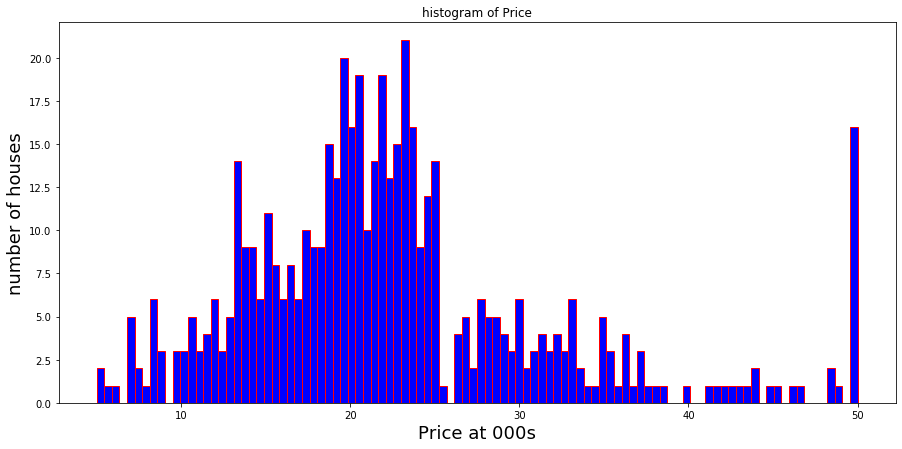

In [9]:
# lets drow Histogram

plt.figure(figsize = (15,7))
plt.hist(data["price"] , bins = 100 , ec = "red" , color = "Blue") # ec = edge color
plt.xlabel("Price at 000s",size = 18)
plt.ylabel("number of houses",size = 18)
plt.title("histogram of Price")
plt.show() 

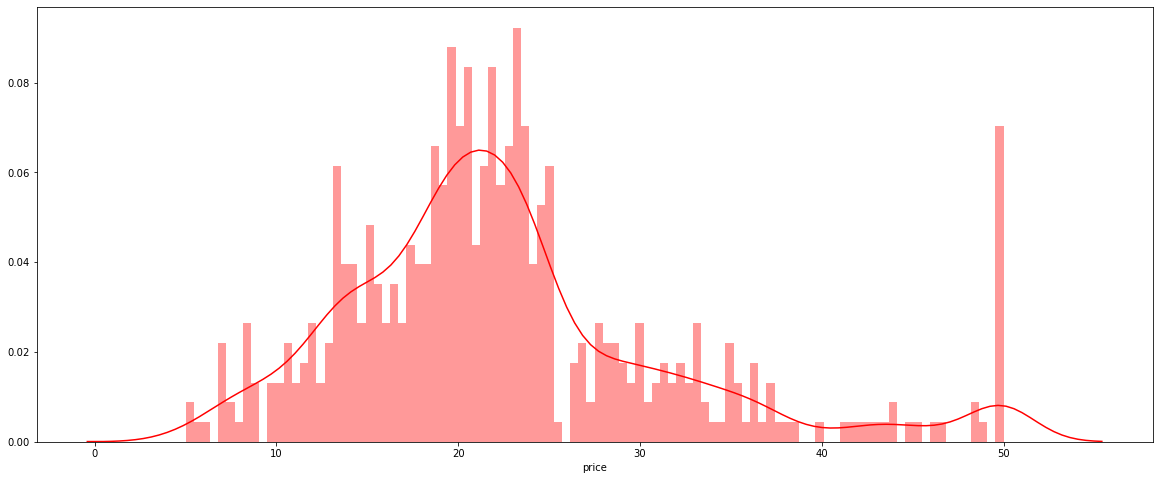

In [10]:
plt.figure(figsize = (20,8))
sns.distplot(data["price"] , bins = 100,color = "red" )
plt.show()

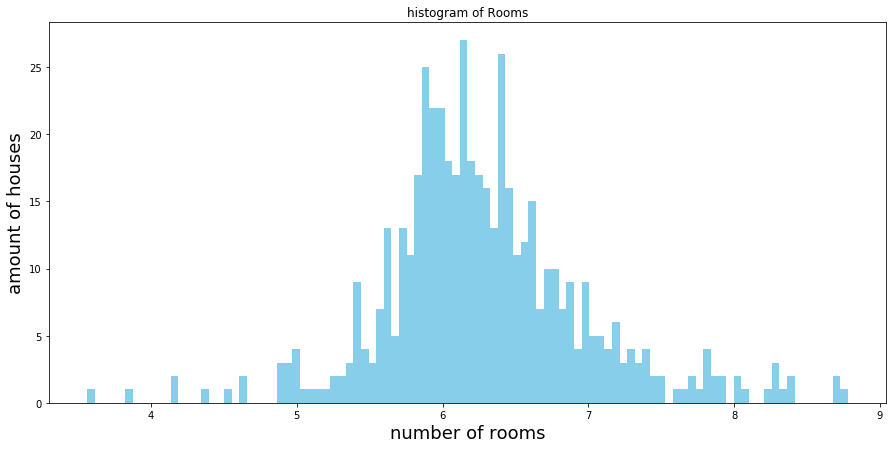

In [11]:
# lets drow Histogram for Room number 

plt.figure(figsize = (15,7))
plt.hist(data["RM"] , bins = 100 , color = "skyblue") 
plt.xlabel("number of rooms",size = 18)
plt.ylabel("amount of houses",size = 18)
plt.title("histogram of Rooms")
plt.show() 

In [12]:
data["RM"].mean()

6.284634387351779

In [13]:
data.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


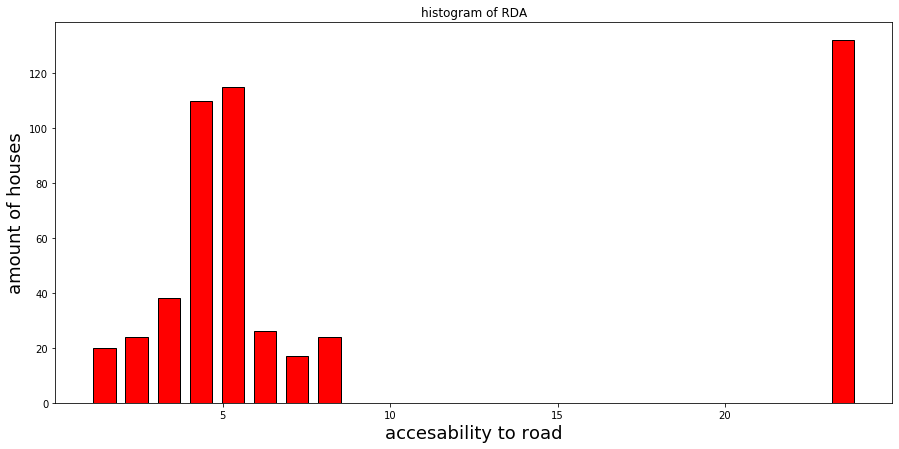

In [14]:
# lets drow Histogram for RDA 

plt.figure(figsize = (15,7))
plt.hist(data["RAD"] , bins = 24, color = "red",ec = "black", rwidth = .7) 
plt.xlabel("accesability to road",size = 18)
plt.ylabel("amount of houses",size = 18)
plt.title("histogram of RDA")
plt.show() 

In [15]:
data["RAD"].value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

In [16]:
data["price"] = data["price"]*1000
data["price"]

0      24000.0
1      21600.0
2      34700.0
3      33400.0
4      36200.0
        ...   
501    22400.0
502    20600.0
503    23900.0
504    22000.0
505    11900.0
Name: price, Length: 506, dtype: float64

In [17]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22532.806324
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9197.104087
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5000.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17025.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21200.000000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25000.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50000.000000


### Corrilation

In [18]:
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [19]:
# Lets Remove the repated correlation 

mask = np.zeros_like(data.corr())
triangular_indices = np.triu_indices_from(mask)
mask[triangular_indices] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

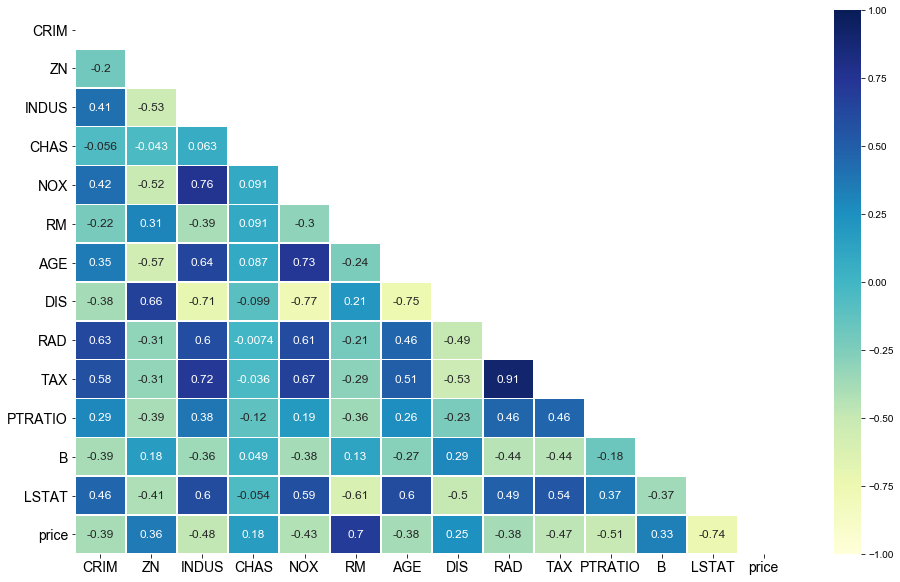

In [20]:
# Lets draw the Heatmap of corrilation among the features

plt.figure(figsize = (16,10))
sns.heatmap(data.corr() , mask = mask, annot = True , annot_kws = {"size" : 12} , vmin = -1,vmax = 1, linewidths = .5, 
            cmap = "YlGnBu")
sns.set_style("white")
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

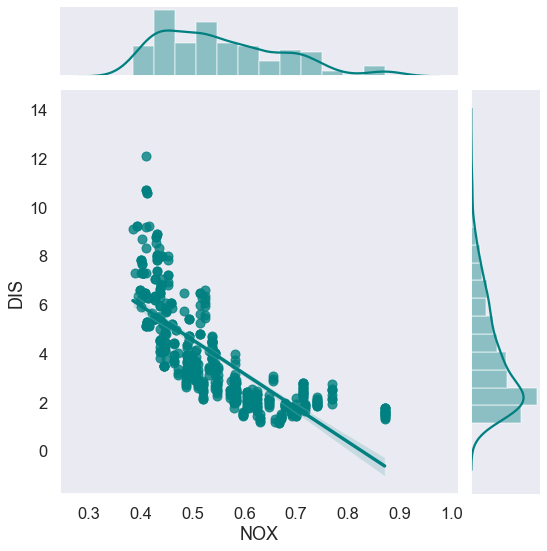

In [21]:
# Lets see the correlation between NOX and DIS

#corr_nox_dis = round(data["NOX"].corr(data["DIS"]),3)

#plt.figure(figsize = (16,7))
#plt.scatter(data["NOX"],data["DIS"],alpha = .5,s=90,color = "indigo")
#plt.title(f"NOX vs DIS(corr :  {corr_nox_dis})",size = 18)
#plt.xlabel("NOX - Nitric Oxid Pollution",size = 15)
#plt.ylabel("DIS - Distence from impoyment",size = 15)

# Using seaborn's JointPLot to plot the features
sns.set()
sns.set_context("talk")
sns.set_style("dark")
sns.jointplot(data["NOX"],data["DIS"],size = 8,color = "teal", kind= "reg" )
plt.show()

CORR :  0.91


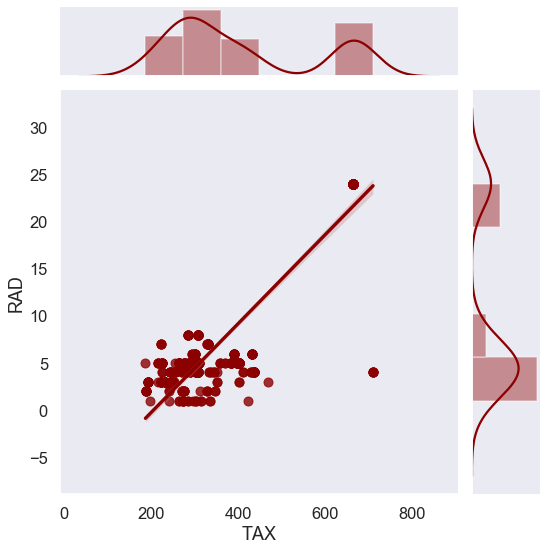

In [22]:
corr = round(data["RAD"].corr(data["TAX"]),3)
print("CORR : ",corr)

# Lets see the two highly correlated(.91) features

sns.set()
sns.set_context("talk")
sns.set_style("dark")
sns.jointplot(data["TAX"],data["RAD"],size = 8,color = "darkred", kind= "reg" )
plt.show()

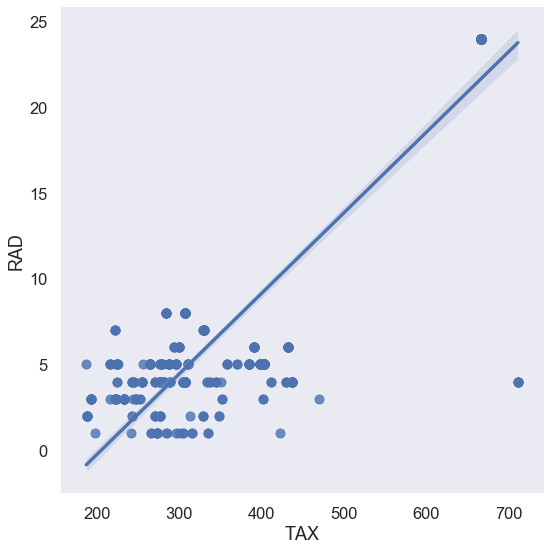

In [23]:
# Using lmplot 
sns.lmplot(x="TAX",y="RAD",data = data,size = 8)
plt.show()

#### This two have the hight correlation(.91) . but after seeing the gragh its clear that the reason they have the high corr value 
#### beacause the value of RAD isnt continuous .and there are outliers .because of those outliers the corr is high

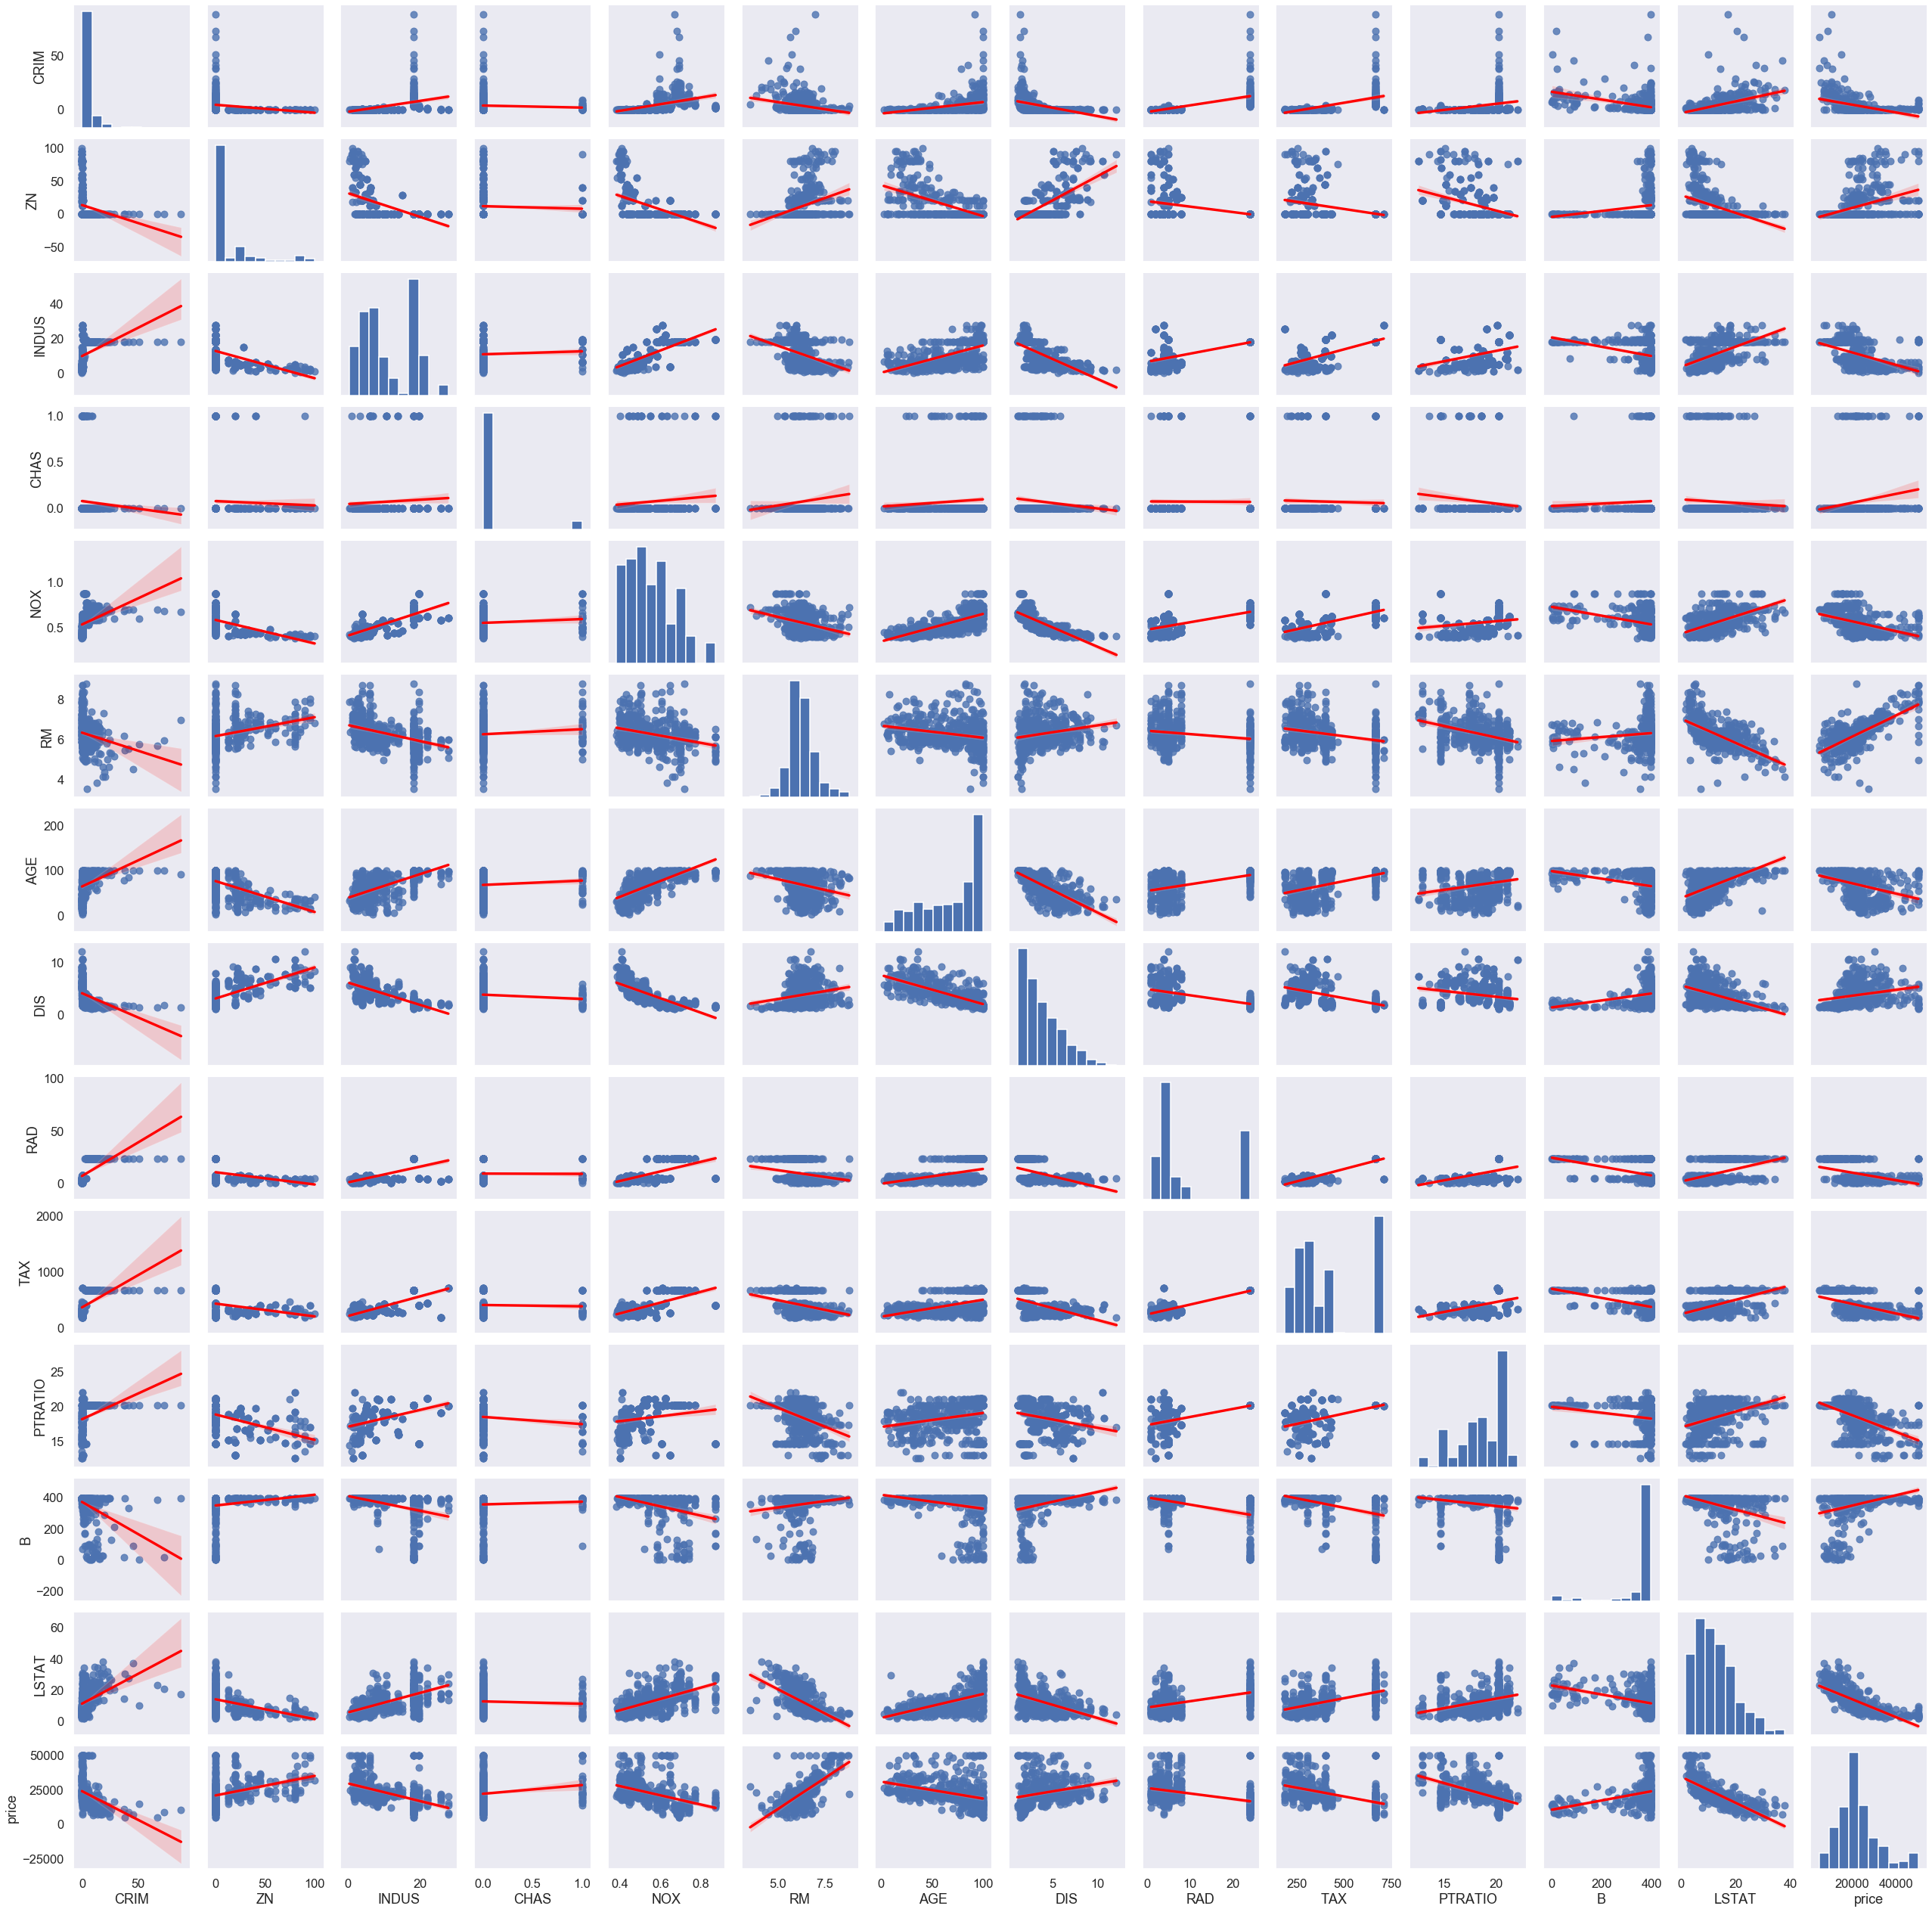

Wall time: 2min 2s


In [24]:
%%time

sns.pairplot(data , kind = "reg", plot_kws = {"line_kws":{"color" : "red"}})
plt.show()

# Trining and Test data Splitting 

In [25]:
prices = data["price"]
features = data.drop("price",axis = 1)

X_train,X_test,y_train,y_test = train_test_split(features,prices, test_size = .2, random_state = 10)

# Multivariable Regression

In [26]:
# Lets run the Regression
reg = LinearRegression()
reg.fit(X_train,y_train)

# lets print out the Intercept(c) and Coefficient(m) for this multiple linear regression
print("Intercept", reg.intercept_)


#Lets print out the R-squired values 

print("R-squared value for Training data : ",reg.score(X_train,y_train))
print("R-squared value for Testing data : ",reg.score(X_test,y_test))

pd.DataFrame(data = reg.coef_ , index = X_train.columns , columns =["coef"])


Intercept 36533.05138282453
R-squared value for Training data :  0.750121534530608
R-squared value for Testing data :  0.6709339839115647


,coef
CRIM,-128.180656
ZN,63.198179
INDUS,-7.576276
CHAS,1974.514517
NOX,-16271.988951
RM,3108.456245
AGE,16.292215
DIS,-1483.013597
RAD,303.988206
TAX,-12.082071


# Data Transformation

In [27]:
data["price"].skew()

1.1080984082549092

#### we need to decrease the skewness as close as zero. thats why we take the target feature and log it 

<function matplotlib.pyplot.show(*args, **kw)>

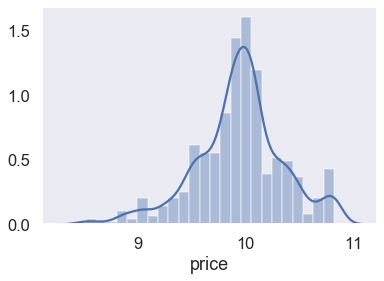

In [28]:
y_log = np.log(data["price"])
sns.distplot(y_log)
plt.show

In [29]:
y_log.skew()

-0.3303212953098796

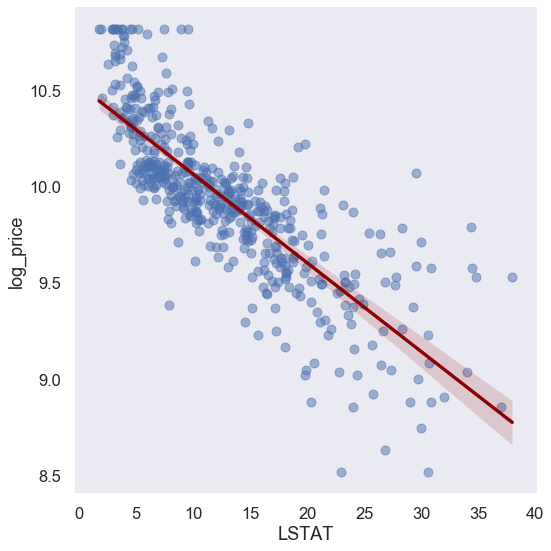

In [30]:
transform_data = features
transform_data["log_price"] = y_log

sns.lmplot(x = "LSTAT",y = "log_price",data = transform_data,scatter_kws = {"alpha":.5},line_kws = {"color" : "darkred"},size = 8)
plt.show()

## Regression Using Log Price

In [31]:
transform_feature = transform_data.drop("log_price",axis=1)
price_log = transform_data["log_price"]
X_train,X_test,y_train,y_test = train_test_split(transform_feature,price_log, test_size = .2, random_state = 10)

In [32]:
# Lets run the Regression
reg = LinearRegression()
reg.fit(X_train,y_train)


#Lets print out the R-squired values 

print("R-squared value for Training data : ",reg.score(X_train,y_train))
print("R-squared value for Testing data : ",reg.score(X_test,y_test))

# lets print out the Intercept(c) and Coefficient(m) for this multiple linear regression
print("Intercept", reg.intercept_)
pd.DataFrame(data = reg.coef_ , index = X_train.columns , columns =["coef"])



R-squared value for Training data :  0.7930234826697583
R-squared value for Testing data :  0.7446922306260739
Intercept 10.967699150757333


,coef
CRIM,-0.010672
ZN,0.001579
INDUS,0.002030
CHAS,0.080331
NOX,-0.704068
RM,0.073404
AGE,0.000763
DIS,-0.047633
RAD,0.014565
TAX,-0.000645


## P-Values and Evaluating Coefficient

In [33]:
x_const = sm.add_constant(X_train) # creat a columns of 1

model = sm.OLS(y_train , x_const) # Ordinary List Squares
results = model.fit()

# Lets see the Parameters(coefficient) and P-Values

#results.params 
#results.pvalues

# Lets set them as a dataframe 

pd.DataFrame({"coef":results.params,"p-values":round(results.pvalues,4)})

,coef,p-values
const,10.967699,0.0000
CRIM,-0.010672,0.0000
ZN,0.001579,0.0086
INDUS,0.002030,0.4445
CHAS,0.080331,0.0382
NOX,-0.704068,0.0000
RM,0.073404,0.0001
AGE,0.000763,0.2092
DIS,-0.047633,0.0000
RAD,0.014565,0.0000


## Testing for Multicollinearaty

#### to calculate Variance Inflation Factor(VIF):

##### step-1:
$$ TAX = \alpha_0 + \alpha_1 RM +\alpha_2 NOX + ...+\alpha_{12}LSTAT $$

##### step-2:
$$ VIF_{TAX} = \frac{1}{(1-R_{TAX})^2} $$

In [34]:
# import modules
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
#VIF(exog = x_const.values,exog_idx = 1)

In [35]:
vif = []
for i in range(x_const.shape[1]):
    t=VIF(exog = x_const.values,exog_idx = i)
    vif.append(t)
#print(vif)
pd.DataFrame({"coef_name":x_const.columns,"vif":np.around(vif,3)})

,coef_name,vif
0,const,597.549
1,CRIM,1.715
2,ZN,2.333
3,INDUS,3.943
4,CHAS,1.079
5,NOX,4.410
6,RM,1.840
7,AGE,3.327
8,DIS,4.223
9,RAD,7.314


#### The threshold value for VIF is 10. we dao not have a value that is higher than 10 .ao we can say we not have significant Multicollinearity

## Model Simplification &  Baysian Information Criterion(BIC)

In [36]:
# original model with log price and all feature

x_const = sm.add_constant(X_train) # creat a columns of 1

model = sm.OLS(y_train , x_const) # Ordinary List Squares
results = model.fit()

# Lets set them as a dataframe 

org_coef = pd.DataFrame({"coef":results.params,"p-values":round(results.pvalues,4)})

# Lets print out the BIC and R-squared value for this model(to see more attribute of results see the documentation )

print("BIC is :",results.bic )
print("R-squared is :",results.rsquared)

BIC is : -139.7499776947883
R-squared is : 0.793023482669758


In [37]:
# model excluding INDUS feature (this feature has the p-value of .445)
x_const = sm.add_constant(X_train)

x_const = x_const.drop("INDUS",axis = 1)

model = sm.OLS(y_train , x_const) # Ordinary List Squares
results = model.fit()

# Lets set them as a dataframe 

coef_exc_indus = pd.DataFrame({"coef":results.params,"p-values":round(results.pvalues,4)})

# Lets print out the BIC and R-squared value for this model(to see more attribute of results see the documentation )

print("BIC is :",results.bic )
print("R-squared is :",results.rsquared)


BIC is : -145.14508855591185
R-squared is : 0.7927126289415163


#### BIC values decreases but the R-squared value are same as before . thats a good sigh

In [38]:
# model excluding INDUS and AGE features 
x_const = sm.add_constant(X_train)

x_const = x_const.drop(["INDUS","AGE"],axis = 1)

model = sm.OLS(y_train , x_const) # Ordinary List Squares
results = model.fit()

# Lets set them as a dataframe 

reduced_coef = pd.DataFrame({"coef":results.params,"p-values":round(results.pvalues,4)})

# Lets print out the BIC and R-squared value for this model(to see more attribute of results see the documentation )

print("BIC is :",results.bic )
print("R-squared is :",results.rsquared)

BIC is : -149.49934294224542
R-squared is : 0.7918657661852807


In [39]:
# Lets see the coef and p value for all three model
fame = [org_coef,coef_exc_indus,reduced_coef]
pd.concat(fame,axis = 1)

,coef,p-values,coef,p-values,coef,p-values
AGE,0.000763,0.2092,0.000766,0.2070,NaN,NaN
B,0.000516,0.0000,0.000511,0.0000,0.000518,0.0000
CHAS,0.080331,0.0382,0.082795,0.0320,0.086449,0.0249
CRIM,-0.010672,0.0000,-0.010721,0.0000,-0.010702,0.0000
DIS,-0.047633,0.0000,-0.049394,0.0000,-0.052692,0.0000
INDUS,0.002030,0.4445,NaN,NaN,NaN,NaN
LSTAT,-0.031390,0.0000,-0.031262,0.0000,-0.030271,0.0000
NOX,-0.704068,0.0000,-0.673365,0.0000,-0.616448,0.0001
PTRATIO,-0.034795,0.0000,-0.034126,0.0000,-0.033481,0.0000
RAD,0.014565,0.0000,0.014014,0.0000,0.013743,0.0000


## Residuals & Residual Plot

In [40]:
# Modified model : Transformed ( using log price) and simplified (droping 2 features)
transform_feature = transform_data.drop(["log_price","INDUS","AGE"],axis=1)
price_log = transform_data["log_price"]
X_train,X_test,y_train,y_test = train_test_split(transform_feature,price_log, test_size = .2, random_state = 10)


# Using stats model
x_const = sm.add_constant(X_train) # creat a columns of 1

model = sm.OLS(y_train , x_const) # Ordinary List Squares
results = model.fit()

# Residuals 
# residuals = y_train - results.fittedvalues


# we dont have to calculate residual manually . Results have a method called "resid"
# results.resid


# lets calculate the correlation between target and predicted y values

corr = y_train.corr(results.fittedvalues)
corr

# Lets calculate the MSE and R-squared values
reduced_log_mse = results.mse_resid
reduced_rsquared = results.rsquared
reduced_log_mse,reduced_rsquared



(0.03487337082354609, 0.7918657661852807)

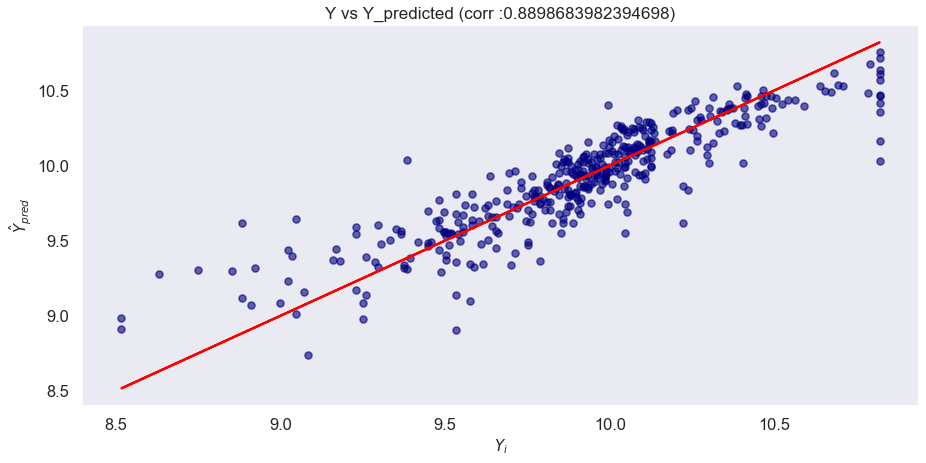

In [41]:
# Graph of Actual vs Residual values

plt.figure(figsize = (15,7))
plt.scatter(x = y_train, y = results.fittedvalues, color = "navy", s = 50, alpha = .6)
plt.plot(y_train,y_train,color = "red")
plt.title(f"Y vs Y_predicted (corr :{corr})",size = 17)
plt.xlabel("$Y_i$",size = 15)
plt.ylabel("$\hat Y_{pred}$",size=15)
plt.show()

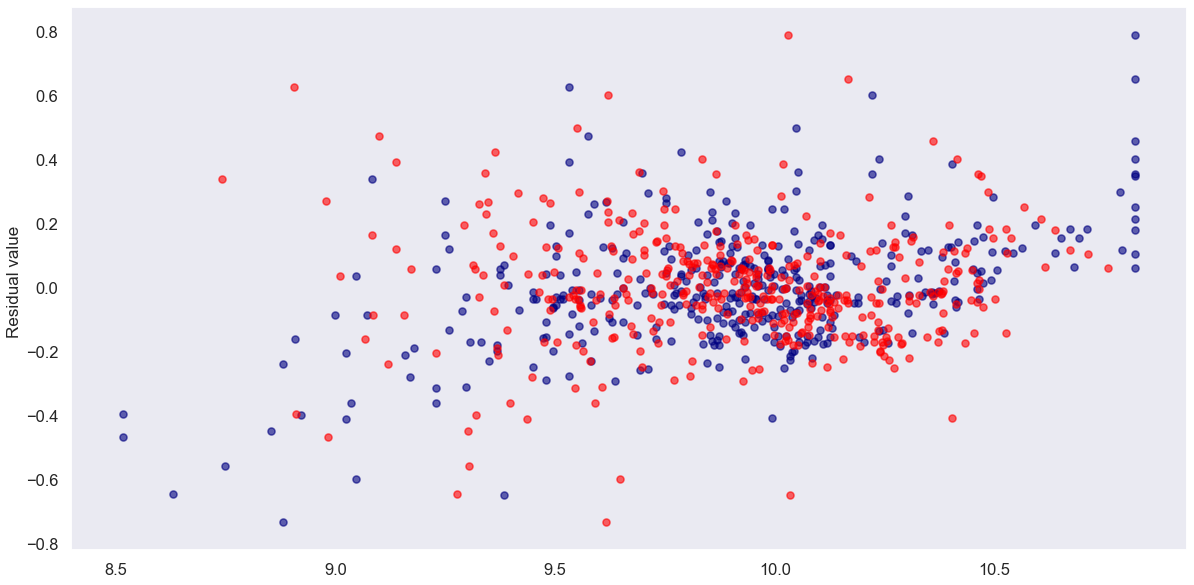

In [42]:
plt.figure(figsize= (20,10))
plt.scatter(x = y_train, y = results.resid, color = "navy", s = 50, alpha = .6)
plt.scatter(x = results.fittedvalues, y = results.resid, color = "red", s = 50, alpha = .6)
plt.ylabel("Residual value ",size=17)
plt.show()

mean of the residual value :  -9.510544167383024e-15
skewness of the residual :  0.1177587620118152


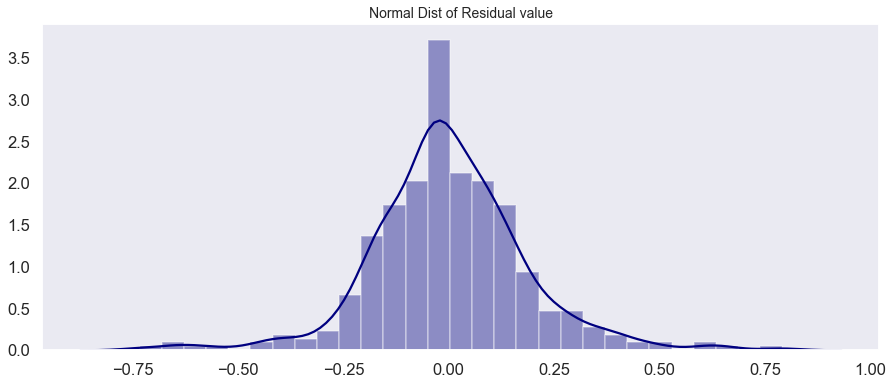

In [43]:
# Distribution of Residual(log price) - checking for Normality 

print("mean of the residual value : ",results.resid.mean() )
print("skewness of the residual : ",results.resid.skew())

# lets plot the residual value 
plt.figure(figsize=(15,6))
sns.distplot(results.resid , color = "navy")
plt.title("Normal Dist of Residual value",size=14)
plt.show()


## Lets see the Difference between Original model and Modified model : 

correlation :  0.8660955689360196


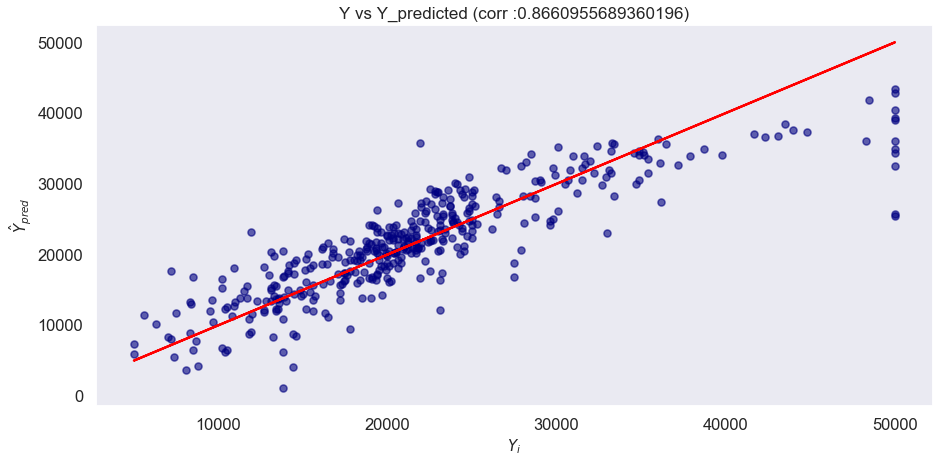

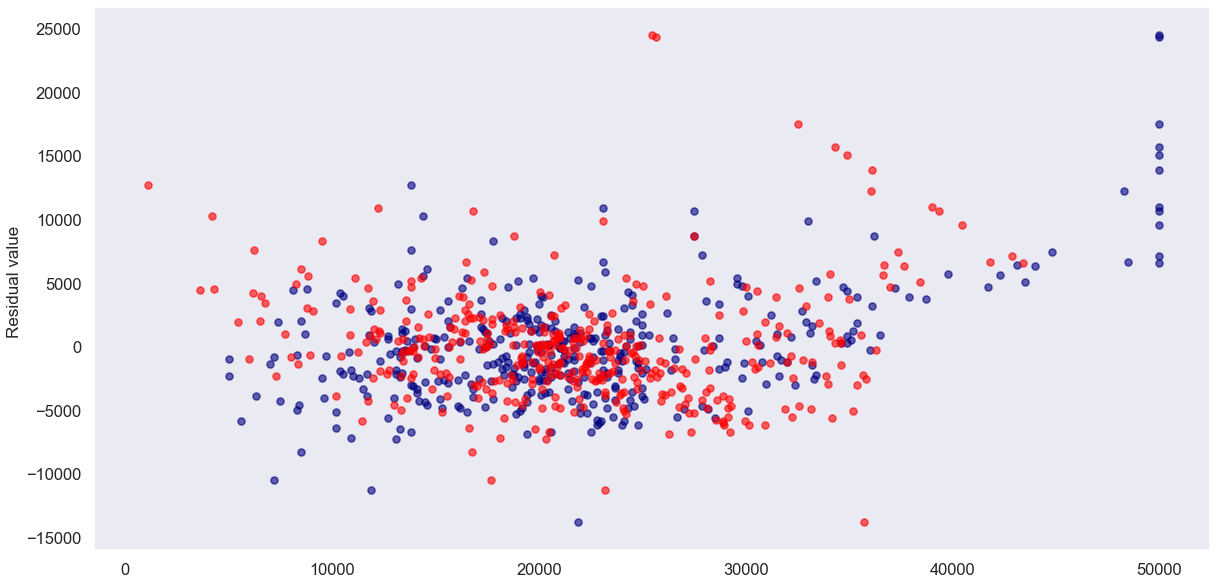

mean of the residual value :  -1.999087364292971e-12
skewness of the residual :  1.459442819667985


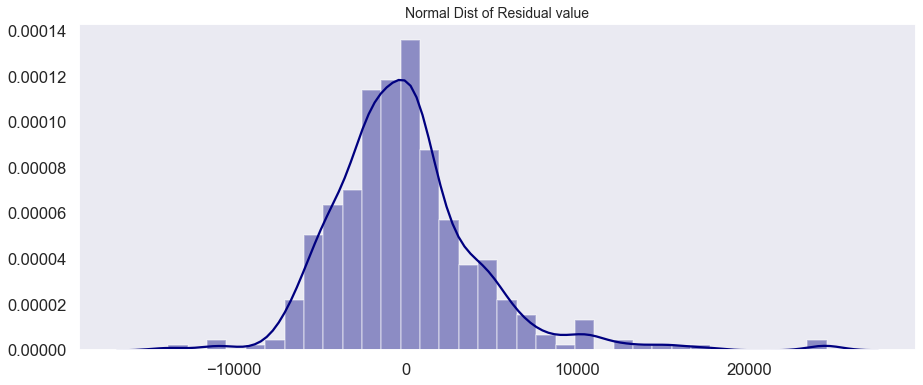

19921197.403247986 0.750121534530608


In [44]:
# Original model : 
transform_feature = data.drop("price",axis = 1)
prices = data["price"]
X_train,X_test,y_train,y_test = train_test_split(transform_feature,prices, test_size = .2, random_state = 10)


# Using stats model
x_const = sm.add_constant(X_train) # creat a columns of 1

model = sm.OLS(y_train , x_const) # Ordinary List Squares
results = model.fit()

# Residuals 
# residuals = y_train - results.fittedvalues


# we dont have to calculate residual manually . Results have a method called "resid"
# results.resid


# lets calculate the correlation between target and predicted y values

corr = y_train.corr(results.fittedvalues)
print("correlation : ",corr)

# Graph of Actual vs Residual values

plt.figure(figsize = (15,7))
plt.scatter(x = y_train, y = results.fittedvalues, color = "navy", s = 50, alpha = .6)
plt.plot(y_train,y_train,color = "red")
plt.title(f"Y vs Y_predicted (corr :{corr})",size = 17)
plt.xlabel("$Y_i$",size = 15)
plt.ylabel("$\hat Y_{pred}$",size=15)
plt.show()

#actual value vs residual 

plt.figure(figsize= (20,10))
plt.scatter(x = y_train, y = results.resid, color = "navy", s = 50, alpha = .6)
plt.scatter(x = results.fittedvalues, y = results.resid, color = "red", s = 50, alpha = .6)
plt.ylabel("Residual value ",size=17)
plt.show()

# Distribution of Residual- checking for Normality 

print("mean of the residual value : ",results.resid.mean() )
print("skewness of the residual : ",results.resid.skew())

# lets plot the residual value 
plt.figure(figsize=(15,6))
sns.distplot(results.resid , color = "navy")
plt.title("Normal Dist of Residual value",size=14)
plt.show()

# Lets calculate the MSE and R-squared values

actual_mse = results.mse_resid
actual_rsquared = results.rsquared
print(actual_mse,actual_rsquared)


In [45]:
pd.DataFrame({"r-squared":(reduced_rsquared,actual_rsquared),"MSE":np.around((reduced_log_mse,actual_mse),2)
             , "RMSE":np.sqrt([reduced_log_mse,actual_mse])},
             index = ["log model","actual_model"])


,r-squared,MSE,RMSE
log model,0.791866,0.03,0.186744
actual_model,0.750122,19921197.40,4463.316861


In [46]:
# Lets say that our Statmate price is 30000$ , then calculate the Upper & Lower bound of the price 

print("1 standard Deviation : ",np.sqrt(reduced_log_mse))
print("2 standard Deviation : ",2*np.sqrt(reduced_log_mse))

upper_bound = np.log(30) + 2*np.sqrt(reduced_log_mse)
print("Upper bound of log price for a 95% prediction interval is : ",upper_bound)
print("Upper bound of Normal price for a 95% prediction interval is : ",np.e**upper_bound * 1000)

lower_bound = np.log(30) - 2*np.sqrt(reduced_log_mse)
print("Lower bound of log price for a 95% prediction interval is : ",lower_bound)
print("Lower bound of Normal price for a 95% prediction interval is : ",np.e**lower_bound * 1000)

1 standard Deviation :  0.1867441319654947
2 standard Deviation :  0.3734882639309894
Upper bound of log price for a 95% prediction interval is :  3.774685645593145
Upper bound of Normal price for a 95% prediction interval is :  43583.80540075524
Lower bound of log price for a 95% prediction interval is :  3.027709117731166
Lower bound of Normal price for a 95% prediction interval is :  20649.871935790266
